In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ratings = pd.read_csv('Ratings.csv', low_memory=False)
users = pd.read_csv('Users.csv', low_memory=False)
books = pd.read_csv('Books.csv', low_memory=False)

#### Books data

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
print("No. of observations:{}\nNo. of parameters:{}".format(books.shape[0],books.shape[1]))

No. of observations:271360
No. of parameters:8


In [5]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [6]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [7]:
books.duplicated().sum()

0

In [8]:
books['Year-Of-Publication'].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909',
       

In [9]:
#since year data has some object it it, we shall convert it into null data
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'],errors='coerce')
books['Year-Of-Publication'].isna().sum()

3

In [10]:
#since year data has the year 0 and 2022 which is invalid, we shall convert it into null data
books.loc[(books['Year-Of-Publication'] > 2022) | (books['Year-Of-Publication'] == 0), 'year'] = np.NAN
#Replacing null data with median 
books['Year-Of-Publication'].fillna(books['year'].median() , inplace = True)
books['Year-Of-Publication'].isna().sum()

3

In [11]:
#Finding and replacing null data from publisher
books.loc[books['Publisher'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,year
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,NaN


In [12]:
#Replacing null data from publisher
books['Publisher'].fillna('other' , inplace = True)
books['Publisher'].isna().sum()

0

In [13]:
#Finding and replacing null data from author
books.loc[books['Book-Author'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,year
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995.0,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,NaN


In [14]:
#replacing null data from publisher
books['Book-Author'].fillna("Unknown" , inplace = True)
books['Book-Author'].isna().sum()

0

#### User data

In [15]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [16]:
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

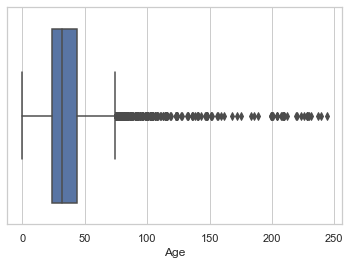

In [17]:
sns.set(style="whitegrid")
sns.boxplot(x='Age',data=users)

In [18]:
print(sorted(users['Age'].unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [19]:
#removing age above 100 and below 5 
users.loc[(users['Age'] > 100) | (users['Age'] < 5) , 'Age' ] = np.NAN

In [20]:
users['Age'].isna().sum()

112010

In [21]:
#Filling the null values with mean
users['Age'].fillna(users['Age'].mean(), inplace = True)

In [22]:
users.duplicated().sum()

0

#### Rating data

In [23]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [24]:
ratings.shape

(1149780, 3)

In [25]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [26]:
ratings.duplicated().sum()

0

In [27]:
ratings.loc[ratings['Book-Rating'] == 0]

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
2,276727,0446520802,0
5,276733,2080674722,0
10,276746,0425115801,0
11,276746,0449006522,0
...,...,...,...
1149769,276704,059032120X,0
1149770,276704,0679752714,0
1149772,276704,080410526X,0
1149774,276704,0876044011,0


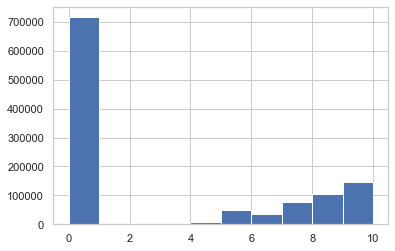

In [28]:
ratings['Book-Rating'].hist(bins=10)

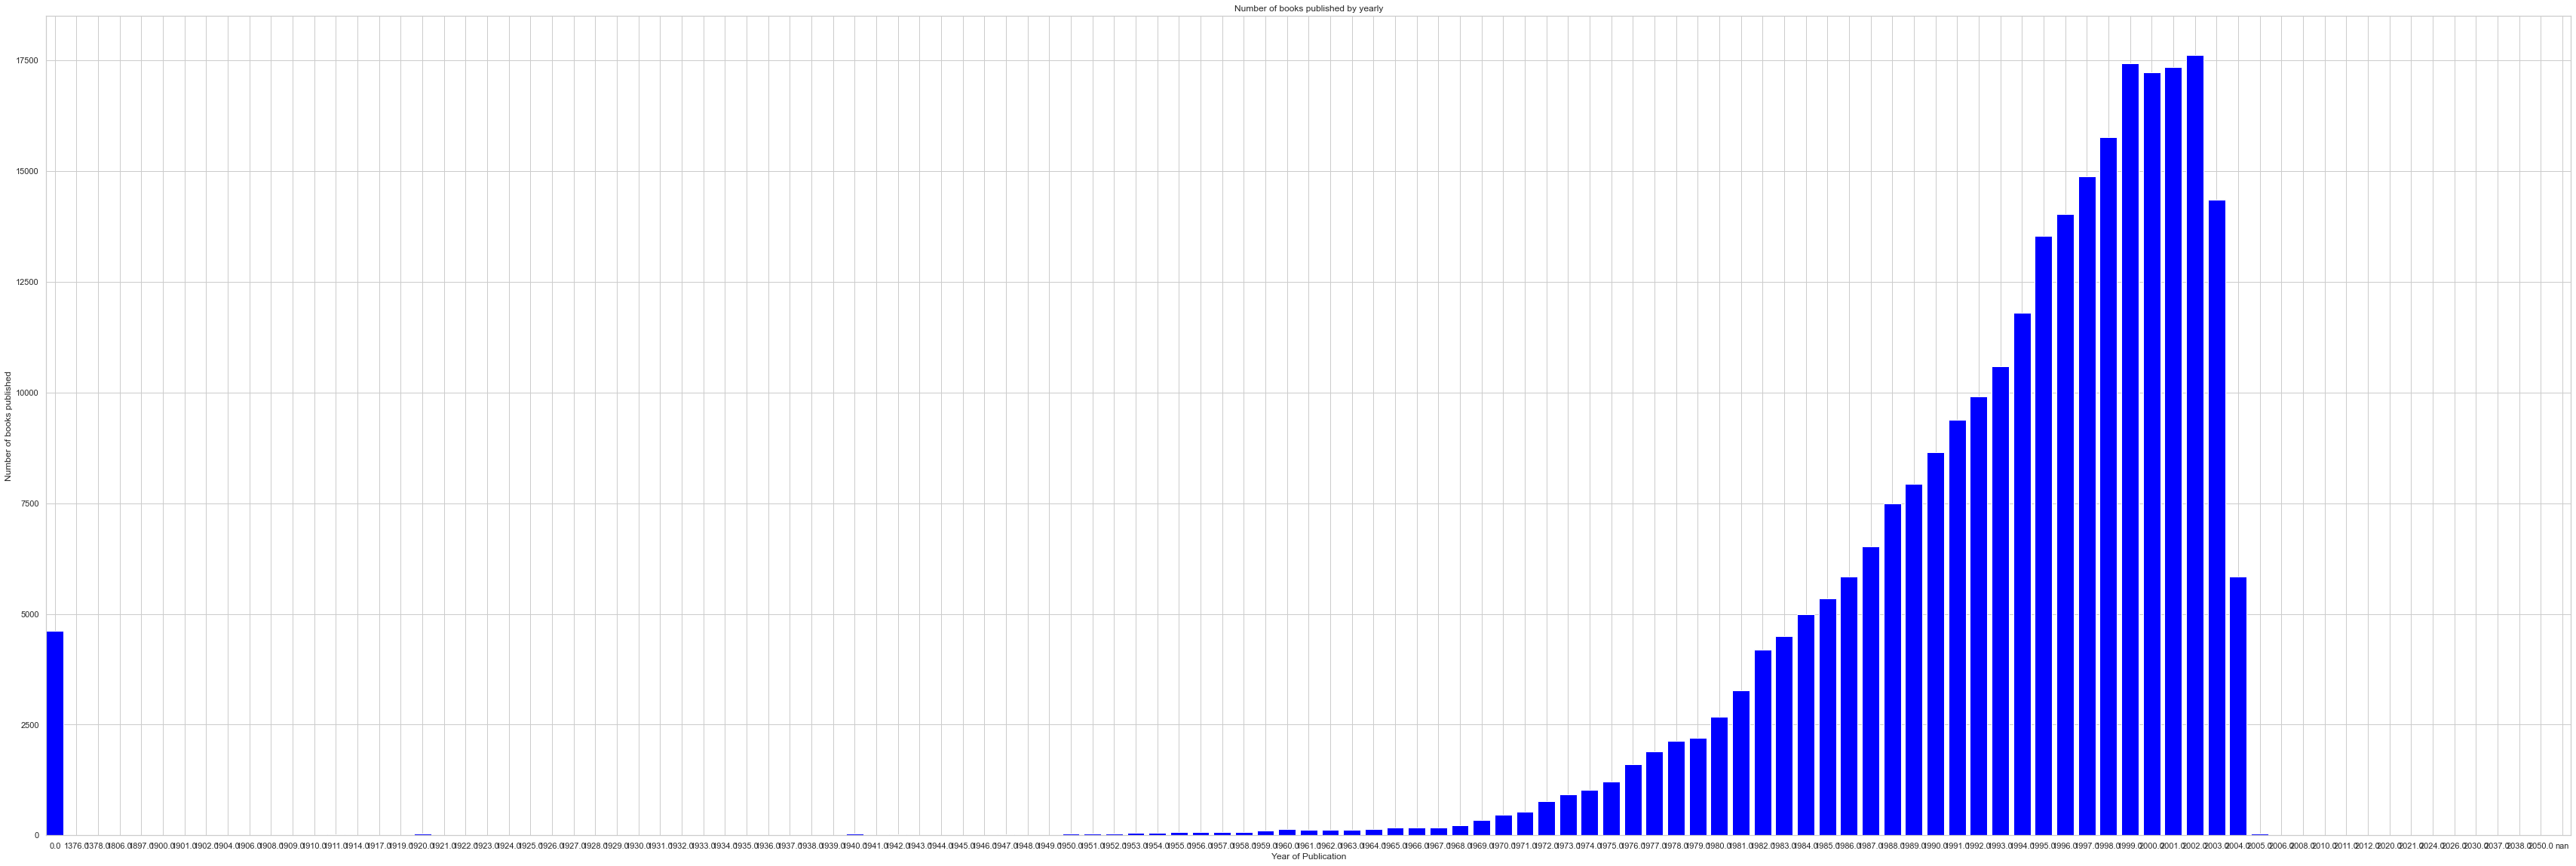

In [29]:
publications = {}
for year in books['Year-Of-Publication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(60, 20))
plt.bar(list(publications.keys()),list(publications.values()), color = 'blue')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published by yearly")
plt.margins(x = 0)
plt.show()

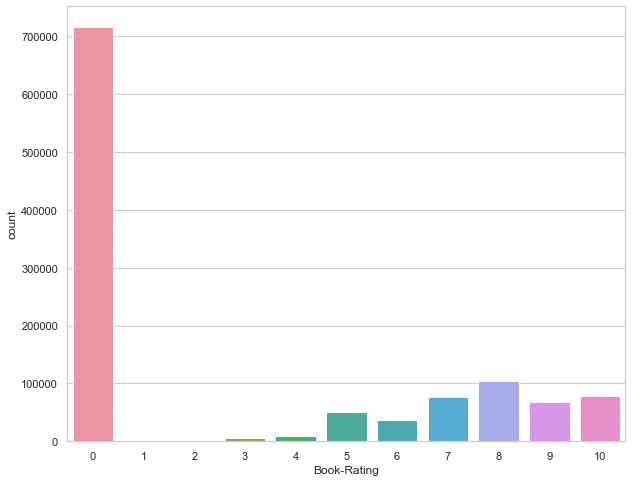

In [30]:
plt.figure(figsize=(10,8))
sns.countplot(x="Book-Rating", data=ratings)

Text(0.5, 1.0, 'Explicit Ratings')

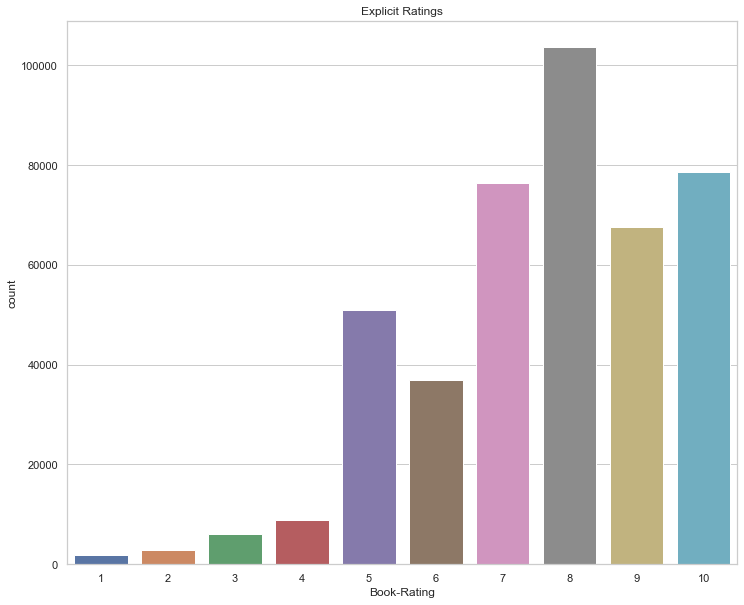

In [31]:
# Explicit Ratings
plt.figure(figsize=(12,10))
data = ratings[ratings['Book-Rating'] != 0]
sns.countplot(x="Book-Rating", data=data)
plt.title("Explicit Ratings")

Text(0.5, 1.0, 'Number of books by an author (Top 20)')

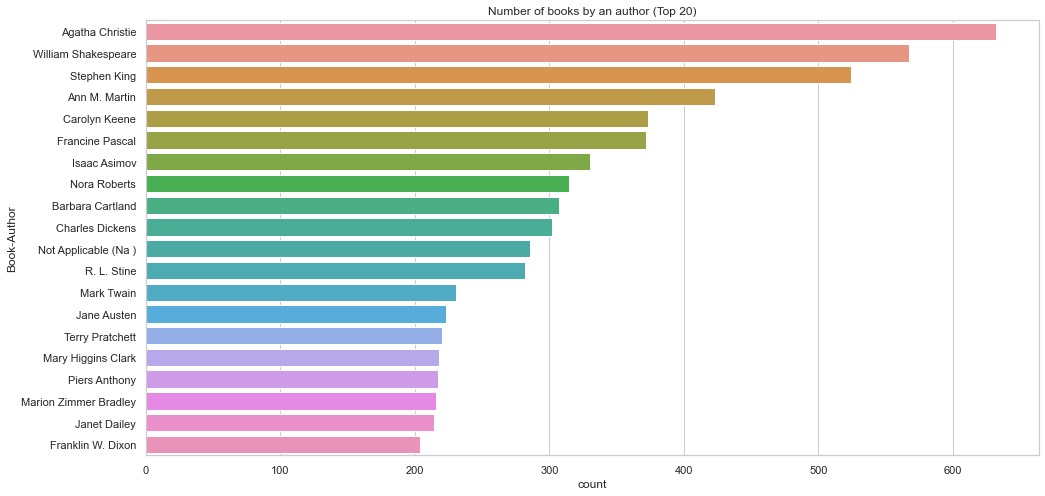

In [32]:
#number of books published by an author (top-20)
plt.figure(figsize=(16,8))
sns.countplot(y="Book-Author", data=books,order=books['Book-Author'].value_counts().index[0:20])
plt.title("Number of books by an author (Top 20)")

Text(0.5, 1.0, 'Number of books published by a publisher (Top 20)')

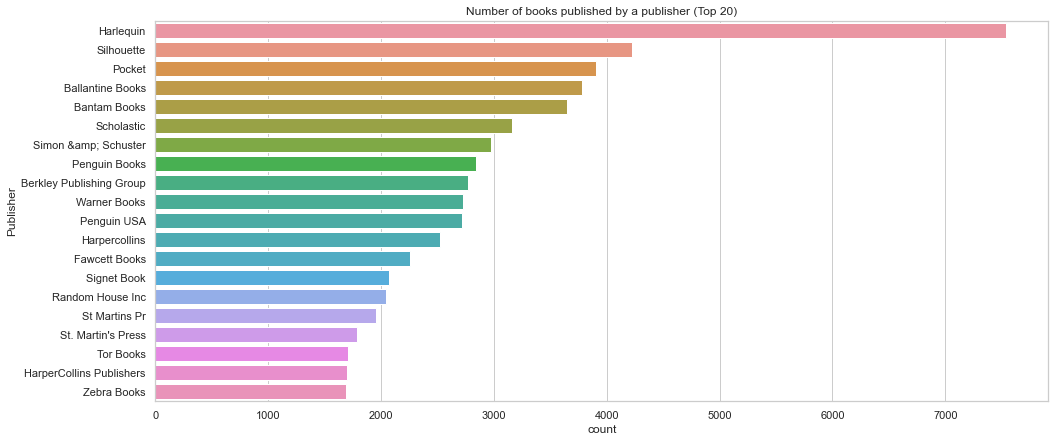

In [33]:
# number of books published by publisher (top 20)
plt.figure(figsize=(16,7))
sns.countplot(y="Publisher", data=books,order=books['Publisher'].value_counts().index[0:20])
plt.title("Number of books published by a publisher (Top 20)")

Text(0.5, 1.0, 'Number of Ratings for a book (Top 10)')

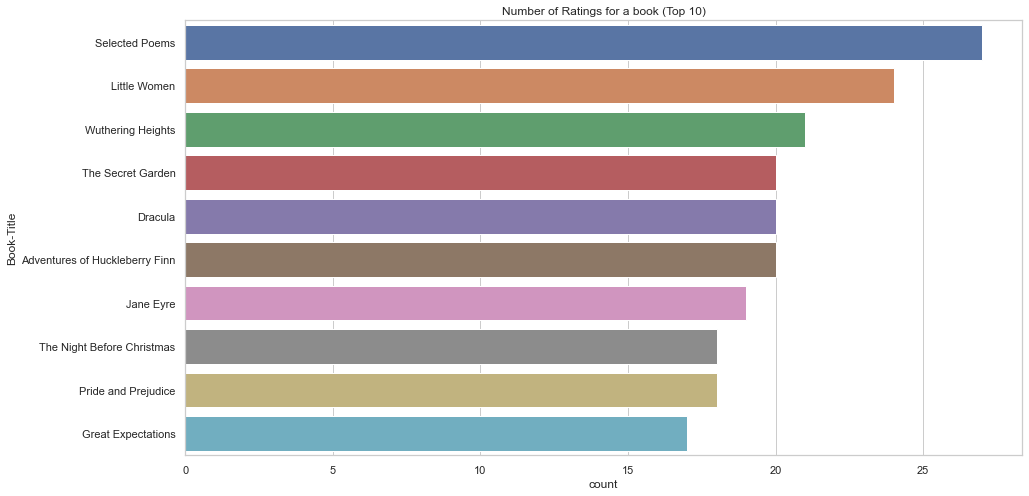

In [34]:
# Plotting of ratings 
plt.figure(figsize=(15,8))
sns.countplot(y="Book-Title", data=books, order=books['Book-Title'].value_counts().index[0:10])
plt.title("Number of Ratings for a book (Top 10)")

## Simple Popularity based Recommendation System

In [35]:
ratings_count = ratings.groupby(by=['ISBN'])['Book-Rating'].sum()
ratings_count = pd.DataFrame(ratings_count)
top10 = ratings_count.sort_values('Book-Rating' , ascending=False).head(10)
print("The following books are recommended")
top10.merge(books , left_index=True , right_on= 'ISBN')

The following books are recommended


,Book-Rating,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,year
408,5787,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,NaN
748,4108,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,NaN
522,3134,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,NaN
2143,2798,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999.0,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,NaN
356,2595,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003.0,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...,NaN
26,2551,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,NaN
1105,2524,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,NaN
706,2402,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998.0,Warner Books,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,NaN
231,2219,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001.0,Plume Books,http://images.amazon.com/images/P/0452282152.0...,http://images.amazon.com/images/P/0452282152.0...,http://images.amazon.com/images/P/0452282152.0...,NaN


# Recommender 2: Collaborative Filtering
Based on records from various users provide recommendations based on user similarities

In [36]:
# merge ratings and books dataset to get movie titles and drop rows for which title is not available
data = pd.merge(ratings, books, on='ISBN')

# get total counts of no. of occurence of book
data['count'] = data.groupby('ISBN').transform('count')['User-ID']

# fetch top 100 books based on count
isbn = data.drop_duplicates('ISBN').sort_values('count', ascending=False).iloc[:100]['ISBN']

# filter out data as per the ISBN
data = data[data['ISBN'].isin(isbn)].reset_index(drop=True)

In [37]:
# create a user book rating matrix
df = data.pivot(index='User-ID', columns='ISBN', values='Book-Rating')
df.head()

ISBN,0060392452,0060502258,0060928336,0060930535,0060934417,0060938455,0060976845,0060987103,0061009059,006101351X,...,0684872153,0684874350,0743237188,0743418174,0786868716,0804106304,080410753X,0842329129,0971880107,1400034779
User-ID,,,,,,,,,,,,,,,,,,,,,
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
from sklearn.metrics.pairwise import cosine_similarity

In [39]:
# replace NaN with user based average rating in pivot dataframe
df_imputed = df.fillna(df.mean(axis=0))

# get similarity between all users
similarity = cosine_similarity(df_imputed.values)

In [40]:
def get_recommendation(user_index):
    idx = user_index
    sim_scores = list(enumerate(similarity[idx]))

    # get books that are unrated by the given user
    unrated_books = df.iloc[idx][df.iloc[idx].isna()].index

    # get weighted ratings of unrated books by all other users
    book_ratings = (df[unrated_books].T * similarity[idx]).T

    # get top 100 similar users by skipping the current user
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:101]

    # get mean of book ratings by top 100 most similar users for the unrated books
    book_ratings = book_ratings.iloc[[x[0] for x in sim_scores]].mean()
    
    # get rid of null values and sort it based on ratings
    book_ratings = book_ratings.reset_index().dropna().sort_values(0, ascending=False).iloc[:10]
    
    # get recommended book titles in sorted order
    recommended_books = data[data['ISBN'].isin(book_ratings['ISBN'])][['ISBN', 'Book-Title']]
    recommended_books = recommended_books.drop_duplicates('ISBN').reset_index(drop=True)

    return pd.DataFrame({'ISBN':recommended_books['ISBN'], 
                         'Recommended Book':recommended_books['Book-Title']})

In [41]:
#Evaluation 1
get_recommendation(10560)

,ISBN,Recommended Book
0,043935806X,Harry Potter and the Order of the Phoenix (Boo...
1,0971880107,Wild Animus
2,0060976845,Little Altars Everywhere: A Novel
3,0312195516,The Red Tent (Bestselling Backlist)
4,0439064872,Harry Potter and the Chamber of Secrets (Book 2)
5,1400034779,The No. 1 Ladies' Detective Agency (Today Show...
6,0786868716,The Five People You Meet in Heaven
7,0375707972,The Reader
8,0375727345,House of Sand and Fog
9,0385335482,Confessions of a Shopaholic (Summer Display Op...


In [42]:
data.loc[data['User-ID'] == 10560].sort_values(by=['Book-Rating'] , ascending = False)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,year,count
11,10560,043935806X,10,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003.0,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,NaN,334
1966,10560,0385504209,10,The Da Vinci Code,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,NaN,883
5860,10560,059035342X,10,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999.0,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,NaN,571
19541,10560,0439064872,10,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000.0,Scholastic,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,NaN,351
14401,10560,0312195516,9,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,NaN,723
681,10560,0316666343,8,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,NaN,1295
20951,10560,0671027360,8,Angels &amp; Demons,Dan Brown,2001.0,Pocket Star,http://images.amazon.com/images/P/0671027360.0...,http://images.amazon.com/images/P/0671027360.0...,http://images.amazon.com/images/P/0671027360.0...,NaN,586
23331,10560,0743418174,8,Good in Bed,Jennifer Weiner,2002.0,Washington Square Press,http://images.amazon.com/images/P/0743418174.0...,http://images.amazon.com/images/P/0743418174.0...,http://images.amazon.com/images/P/0743418174.0...,NaN,470


In [43]:
#Evaluation 2
get_recommendation(11676)

,ISBN,Recommended Book
0,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...
1,0446310786,To Kill a Mockingbird
2,0156027321,Life of Pi
3,0345339681,The Hobbit : The Enchanting Prelude to The Lor...
4,0440211727,A Time to Kill
5,0375727345,House of Sand and Fog
6,0380789035,American Gods
7,044021145X,The Firm
8,0452282829,We Were the Mulvaneys
9,0842329129,Left Behind: A Novel of the Earth's Last Days ...


In [44]:
data.loc[data['User-ID'] == 11676].sort_values(by=['Book-Rating'] , ascending = False)
#2 books are common between the recommendation books and the books read by the user

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,year,count
26665,11676,067976402X,10,Snow Falling on Cedars,David Guterson,1995.0,Vintage Books USA,http://images.amazon.com/images/P/067976402X.0...,http://images.amazon.com/images/P/067976402X.0...,http://images.amazon.com/images/P/067976402X.0...,NaN,614
39587,11676,0060938455,10,Fast Food Nation: The Dark Side of the All-Ame...,Eric Schlosser,2002.0,Perennial,http://images.amazon.com/images/P/0060938455.0...,http://images.amazon.com/images/P/0060938455.0...,http://images.amazon.com/images/P/0060938455.0...,NaN,321
36608,11676,0452282829,10,We Were the Mulvaneys,Joyce Carol Oates,1996.0,Plume,http://images.amazon.com/images/P/0452282829.0...,http://images.amazon.com/images/P/0452282829.0...,http://images.amazon.com/images/P/0452282829.0...,NaN,342
14403,11676,0312195516,10,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,NaN,723
26378,11676,0449212602,10,The Handmaid's Tale,Margaret Atwood,1989.0,Fawcett Books,http://images.amazon.com/images/P/0449212602.0...,http://images.amazon.com/images/P/0449212602.0...,http://images.amazon.com/images/P/0449212602.0...,NaN,273
...,...,...,...,...,...,...,...,...,...,...,...,...
33575,11676,0446606812,0,Message in a Bottle,Nicholas Sparks,1999.0,Warner Vision,http://images.amazon.com/images/P/0446606812.0...,http://images.amazon.com/images/P/0446606812.0...,http://images.amazon.com/images/P/0446606812.0...,NaN,369
17762,11676,0316284955,0,White Oleander : A Novel (Oprah's Book Club),Janet Fitch,2000.0,Back Bay Books,http://images.amazon.com/images/P/0316284955.0...,http://images.amazon.com/images/P/0316284955.0...,http://images.amazon.com/images/P/0316284955.0...,NaN,356
16864,11676,0142001740,0,The Secret Life of Bees,Sue Monk Kidd,2003.0,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...,NaN,615
34862,11676,0380789035,0,American Gods,Neil Gaiman,2002.0,HarperTorch,http://images.amazon.com/images/P/0380789035.0...,http://images.amazon.com/images/P/0380789035.0...,http://images.amazon.com/images/P/0380789035.0...,NaN,302


In [45]:
#Evaluation 3
get_recommendation(8066)

,ISBN,Recommended Book
0,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...
1,0446310786,To Kill a Mockingbird
2,0345443284,While I Was Gone
3,0316601950,The Pilot's Wife : A Novel
4,0156027321,Life of Pi
5,0312195516,The Red Tent (Bestselling Backlist)
6,0345339681,The Hobbit : The Enchanting Prelude to The Lor...
7,0743418174,Good in Bed
8,0375725784,A Heartbreaking Work of Staggering Genius
9,0380789035,American Gods


In [46]:
data.loc[data['User-ID'] ==8066].sort_values(by=['Book-Rating'] , ascending = False)
#2 books are common between the recommendation books and the books read by the user

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,year,count
16856,8066,0142001740,10,The Secret Life of Bees,Sue Monk Kidd,2003.0,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...,NaN,615
9462,8066,0060502258,9,The Divine Secrets of the Ya-Ya Sisterhood: A ...,Rebecca Wells,2002.0,HarperTorch,http://images.amazon.com/images/P/0060502258.0...,http://images.amazon.com/images/P/0060502258.0...,http://images.amazon.com/images/P/0060502258.0...,NaN,376
13920,8066,0156027321,9,Life of Pi,Yann Martel,2003.0,Harvest Books,http://images.amazon.com/images/P/0156027321.0...,http://images.amazon.com/images/P/0156027321.0...,http://images.amazon.com/images/P/0156027321.0...,NaN,462
23327,8066,0743418174,8,Good in Bed,Jennifer Weiner,2002.0,Washington Square Press,http://images.amazon.com/images/P/0743418174.0...,http://images.amazon.com/images/P/0743418174.0...,http://images.amazon.com/images/P/0743418174.0...,NaN,470
11378,8066,044023722X,7,A Painted House,John Grisham,2001.0,Dell Publishing Company,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,NaN,647
28004,8066,0446672211,7,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998.0,Warner Books,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,NaN,585
1958,8066,0385504209,0,The Da Vinci Code,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,NaN,883
6797,8066,0440220602,0,The Chamber,John Grisham,1995.0,Dell Publishing Company,http://images.amazon.com/images/P/0440220602.0...,http://images.amazon.com/images/P/0440220602.0...,http://images.amazon.com/images/P/0440220602.0...,NaN,379
12958,8066,0452282152,0,Girl with a Pearl Earring,Tracy Chevalier,2001.0,Plume Books,http://images.amazon.com/images/P/0452282152.0...,http://images.amazon.com/images/P/0452282152.0...,http://images.amazon.com/images/P/0452282152.0...,NaN,526
20516,8066,1400034779,0,The No. 1 Ladies' Detective Agency (Today Show...,Alexander McCall Smith,2003.0,Anchor,http://images.amazon.com/images/P/1400034779.0...,http://images.amazon.com/images/P/1400034779.0...,http://images.amazon.com/images/P/1400034779.0...,NaN,431


In [47]:
#Evaluation 4
get_recommendation(254)

,ISBN,Recommended Book
0,0316666343,The Lovely Bones: A Novel
1,0971880107,Wild Animus
2,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...
3,0446310786,To Kill a Mockingbird
4,0345342968,Fahrenheit 451
5,0156027321,Life of Pi
6,0345339681,The Hobbit : The Enchanting Prelude to The Lor...
7,0375707972,The Reader
8,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...
9,0380789035,American Gods


In [48]:
data.loc[data['User-ID'] ==254].sort_values(by=['Book-Rating'] , ascending = False)
#1 book is common between the recommendation books and the books read by the user

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,year,count
34851,254,0380789035,10,American Gods,Neil Gaiman,2002.0,HarperTorch,http://images.amazon.com/images/P/0380789035.0...,http://images.amazon.com/images/P/0380789035.0...,http://images.amazon.com/images/P/0380789035.0...,NaN,302
16836,254,0142001740,9,The Secret Life of Bees,Sue Monk Kidd,2003.0,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...,NaN,615
19530,254,0439064872,9,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000.0,Scholastic,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,NaN,351
10547,254,0671021001,7,She's Come Undone (Oprah's Book Club),Wally Lamb,1998.0,Pocket,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...,NaN,468
2,254,043935806X,0,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003.0,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,NaN,334
26636,254,067976402X,0,Snow Falling on Cedars,David Guterson,1995.0,Vintage Books USA,http://images.amazon.com/images/P/067976402X.0...,http://images.amazon.com/images/P/067976402X.0...,http://images.amazon.com/images/P/067976402X.0...,NaN,614
36323,254,014028009X,0,Bridget Jones's Diary,Helen Fielding,1999.0,Penguin Books,http://images.amazon.com/images/P/014028009X.0...,http://images.amazon.com/images/P/014028009X.0...,http://images.amazon.com/images/P/014028009X.0...,NaN,270
32506,254,0375727345,0,House of Sand and Fog,Andre Dubus III,2000.0,Vintage Books,http://images.amazon.com/images/P/0375727345.0...,http://images.amazon.com/images/P/0375727345.0...,http://images.amazon.com/images/P/0375727345.0...,NaN,552
32043,254,0446605239,0,The Notebook,Nicholas Sparks,1998.0,Warner Books,http://images.amazon.com/images/P/0446605239.0...,http://images.amazon.com/images/P/0446605239.0...,http://images.amazon.com/images/P/0446605239.0...,NaN,465
31039,254,0684874350,0,ANGELA'S ASHES,Frank McCourt,1996.0,Scribner,http://images.amazon.com/images/P/0684874350.0...,http://images.amazon.com/images/P/0684874350.0...,http://images.amazon.com/images/P/0684874350.0...,NaN,269


In [49]:
#Evaluation 4
get_recommendation(10314)

,ISBN,Recommended Book
0,0385504209,The Da Vinci Code
1,0440236673,The Brethren
2,0316601950,The Pilot's Wife : A Novel
3,0312195516,The Red Tent (Bestselling Backlist)
4,0786868716,The Five People You Meet in Heaven
5,0375725784,A Heartbreaking Work of Staggering Genius
6,0345378490,Congo
7,0375727345,House of Sand and Fog
8,014028009X,Bridget Jones's Diary
9,0385335482,Confessions of a Shopaholic (Summer Display Op...


In [50]:
data.loc[data['User-ID'] == 10314].sort_values(by=['Book-Rating'] , ascending = False)
#2 books are common between the recommendation books and the books read by the user

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,year,count
6422,10314,0446310786,9,To Kill a Mockingbird,Harper Lee,1988.0,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,NaN,389
23330,10314,0743418174,9,Good in Bed,Jennifer Weiner,2002.0,Washington Square Press,http://images.amazon.com/images/P/0743418174.0...,http://images.amazon.com/images/P/0743418174.0...,http://images.amazon.com/images/P/0743418174.0...,NaN,470
13488,10314,0060976845,9,Little Altars Everywhere: A Novel,Rebecca Wells,1996.0,Perennial,http://images.amazon.com/images/P/0060976845.0...,http://images.amazon.com/images/P/0060976845.0...,http://images.amazon.com/images/P/0060976845.0...,NaN,434
14400,10314,0312195516,9,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,NaN,723
10248,10314,0553572997,8,The Alienist,Caleb Carr,1995.0,Bantam Books,http://images.amazon.com/images/P/0553572997.0...,http://images.amazon.com/images/P/0553572997.0...,http://images.amazon.com/images/P/0553572997.0...,NaN,309
12394,10314,0316601950,8,The Pilot's Wife : A Novel,Anita Shreve,1999.0,Back Bay Books,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...,NaN,568
33941,10314,068484477X,7,STONES FROM THE RIVER,Ursula Hegi,1997.0,Touchstone,http://images.amazon.com/images/P/068484477X.0...,http://images.amazon.com/images/P/068484477X.0...,http://images.amazon.com/images/P/068484477X.0...,NaN,341
18116,10314,0316776963,7,Me Talk Pretty One Day,David Sedaris,2001.0,Back Bay Books,http://images.amazon.com/images/P/0316776963.0...,http://images.amazon.com/images/P/0316776963.0...,http://images.amazon.com/images/P/0316776963.0...,NaN,340
41088,10314,0375700757,6,Cold Mountain : A Novel,CHARLES FRAZIER,1998.0,Vintage,http://images.amazon.com/images/P/0375700757.0...,http://images.amazon.com/images/P/0375700757.0...,http://images.amazon.com/images/P/0375700757.0...,NaN,311
35161,10314,0385265700,6,The Book of Ruth (Oprah's Book Club (Paperback)),Jane Hamilton,1990.0,Anchor,http://images.amazon.com/images/P/0385265700.0...,http://images.amazon.com/images/P/0385265700.0...,http://images.amazon.com/images/P/0385265700.0...,NaN,319


In [51]:
#Evaluation 5
get_recommendation(11601)

,ISBN,Recommended Book
0,0385504209,The Da Vinci Code
1,0971880107,Wild Animus
2,0060502258,The Divine Secrets of the Ya-Ya Sisterhood: A ...
3,0452282152,Girl with a Pearl Earring
4,0316096199,Lucky : A Memoir
5,0345339681,The Hobbit : The Enchanting Prelude to The Lor...
6,0671027360,Angels &amp; Demons
7,0743418174,Good in Bed
8,0060987103,Wicked: The Life and Times of the Wicked Witch...
9,0060938455,Fast Food Nation: The Dark Side of the All-Ame...


In [52]:
data.loc[data['User-ID'] == 11601].sort_values(by=['Book-Rating'] , ascending = False)
#1 book is common between the recommendation books and the books read by the user

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,year,count
6423,11601,0446310786,10,To Kill a Mockingbird,Harper Lee,1988.0,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,NaN,389
39586,11601,0060938455,10,Fast Food Nation: The Dark Side of the All-Ame...,Eric Schlosser,2002.0,Perennial,http://images.amazon.com/images/P/0060938455.0...,http://images.amazon.com/images/P/0060938455.0...,http://images.amazon.com/images/P/0060938455.0...,NaN,321
10250,11601,0553572997,0,The Alienist,Caleb Carr,1995.0,Bantam Books,http://images.amazon.com/images/P/0553572997.0...,http://images.amazon.com/images/P/0553572997.0...,http://images.amazon.com/images/P/0553572997.0...,NaN,309
38834,11601,0312278586,0,The Nanny Diaries: A Novel,Emma McLaughlin,2002.0,St. Martin's Press,http://images.amazon.com/images/P/0312278586.0...,http://images.amazon.com/images/P/0312278586.0...,http://images.amazon.com/images/P/0312278586.0...,NaN,474
38246,11601,0440224675,0,Hannibal,Thomas Harris,2000.0,Dell Publishing Company,http://images.amazon.com/images/P/0440224675.0...,http://images.amazon.com/images/P/0440224675.0...,http://images.amazon.com/images/P/0440224675.0...,NaN,284
36607,11601,0452282829,0,We Were the Mulvaneys,Joyce Carol Oates,1996.0,Plume,http://images.amazon.com/images/P/0452282829.0...,http://images.amazon.com/images/P/0452282829.0...,http://images.amazon.com/images/P/0452282829.0...,NaN,342
33943,11601,068484477X,0,STONES FROM THE RIVER,Ursula Hegi,1997.0,Touchstone,http://images.amazon.com/images/P/068484477X.0...,http://images.amazon.com/images/P/068484477X.0...,http://images.amazon.com/images/P/068484477X.0...,NaN,341
33073,11601,0345337662,0,Interview with the Vampire,Anne Rice,1993.0,Ballantine Books,http://images.amazon.com/images/P/0345337662.0...,http://images.amazon.com/images/P/0345337662.0...,http://images.amazon.com/images/P/0345337662.0...,NaN,506
31052,11601,0684874350,0,ANGELA'S ASHES,Frank McCourt,1996.0,Scribner,http://images.amazon.com/images/P/0684874350.0...,http://images.amazon.com/images/P/0684874350.0...,http://images.amazon.com/images/P/0684874350.0...,NaN,269
29704,11601,0743237188,0,Fall On Your Knees (Oprah #45),Ann-Marie MacDonald,2002.0,Touchstone,http://images.amazon.com/images/P/0743237188.0...,http://images.amazon.com/images/P/0743237188.0...,http://images.amazon.com/images/P/0743237188.0...,NaN,284


In [53]:
import pickle

In [54]:
pickle.dump(data.to_dict(),open('data.pkl','wb'))

In [ ]:
pickle.dump(similarity,open('similarity.pkl','wb'))

In [ ]:
pickle.dump(df,open('df.pkl','wb'))